# RTML Midterm 2021

1. In Lab 06, you fine tuned a Mask R-CNN model on the Cityscapes dataset. Download the image at http://www.cs.ait.ac.th/~mdailey/20201112_072342.jpg and run it through
   you model. Provide your source code to load the model, image, get the result, and display the result here. Display the resulting bounding boxes and masks. 

In [1]:
import torch
import torchvision
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.datasets import CocoDetection

import utils
from coco_utils import get_city
import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Load a model pre-trained on COCO and put it in inference mode
path = "../lab6/city_weights/mask-rcnn-09-epochs.pth"
print('Loading pretrained model...')
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=False)

model.load_state_dict(torch.load(path, map_location=device)) 
model.eval()

Loading pretrained model...


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu):

In [2]:
#load image
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
preprocess = transforms.Compose([
    transforms.ToTensor()
])

img_path = "./image"
img_folder = './image'
ann_file = '/root/labs/Cityscapes/annotations/instancesonly_filtered_gtFine_val.json'

#dataset = CocoDetection(img_folder, ann_file, transforms=preprocess)
import helper

dataset = datasets.ImageFolder(img_path, transform=preprocess)


val_dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0)
images, labels = next(iter(val_dataloader))


In [3]:

model.to(device)
images, targets = next(iter(val_dataloader))
# import numpy as np
images = [img.to(device) for img in images]
print(len(images))
# images.to(device)
predictions = model(images)
print(predictions)

print('Prediction keys:', list(dict(predictions[0])))
print('Boxes shape:', predictions[0]['boxes'])
print('Labels shape:', predictions[0]['labels'].shape)
print('Scores shape:', predictions[0]['scores'].shape)
print('Masks shape:', predictions[0]['masks'])

1
[{'boxes': tensor([[3019.8655, 1348.9965, 3169.1460, 1434.2233],
        [ 304.7679,  591.4370, 1859.9025, 1832.5529],
        [ 141.5512,  200.1582, 3921.3518, 1822.2751],
        [ 242.8794,  273.7198, 3453.4316, 1910.3984],
        [ 400.1719,  673.6343, 1909.9603, 1867.7961],
        [3019.1887, 1343.7679, 3167.4346, 1434.8394],
        [2637.9656, 1453.4728, 3009.1890, 1478.8118]], device='cuda:0',
       grad_fn=<StackBackward>), 'labels': tensor([3, 3, 5, 3, 5, 7, 3], device='cuda:0'), 'scores': tensor([0.3638, 0.1707, 0.1626, 0.1329, 0.1207, 0.0589, 0.0513],
       device='cuda:0', grad_fn=<IndexBackward>), 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [

In [4]:
import numpy as np
import cv2
import random

# Array of labels for COCO dataset (91 elements)

coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Random colors to use for labeling objects

COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3)).astype(np.uint8)

# Overlay masks, bounding boxes, and labels on input numpy image

def draw_segmentation_map(image, masks, boxes, labels):
    alpha = 1
    beta = 0.5 # transparency for the segmentation map
    gamma = 0 # scalar added to each sum
    # convert from RGB to OpenCV BGR format
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    for i in range(len(masks)):
        mask = masks[i,:,:]
        red_map = np.zeros_like(mask).astype(np.uint8)
        green_map = np.zeros_like(mask).astype(np.uint8)
        blue_map = np.zeros_like(mask).astype(np.uint8)
        # apply a randon color mask to each object
        color = COLORS[random.randrange(0, len(COLORS))]
        red_map[mask > 0.5] = color[0]
        green_map[mask > 0.5] = color[1]
        blue_map[mask > 0.5] = color[2]
        # combine all the masks into a single image
        segmentation_map = np.stack([red_map, green_map, blue_map], axis=2)
        # apply colored mask to the image
        image = cv2.addWeighted(image, alpha, segmentation_map, beta, gamma)
        # draw the bounding box around each object
        p1 = (int(boxes[i][0]), int(boxes[i][1]))
        p2 = (int(boxes[i][2]), int(boxes[i][3]))
        color = (int(color[0]), int(color[1]), int(color[2]))
        cv2.rectangle(image, p1, p2, color, 2)
        # put the label text above the objects
        p = (int(boxes[i][0]), int(boxes[i][1]-10))
        cv2.putText(image, labels[i], p, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2, cv2.LINE_AA)
    
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Overlay masks, bounding boxes, and labels of objects with scores greater than
# threshold on one of the images in the input tensor using the predictions output by Mask R-CNN.

def prediction_to_mask_image(images, predictions, img_index, threshold):
    scores = predictions[img_index]['scores']
    print(scores)
    boxes_to_use = scores >= threshold
    img = (images[img_index].cpu().permute(1, 2, 0).numpy() * 255).astype(np.uint8)
    img = cv2.flip(img, 0)
    img = cv2.flip(img, 1)
    masks = predictions[img_index]['masks'][boxes_to_use, :, :].cpu().detach().squeeze(1).numpy()
   
    boxes = predictions[img_index]['boxes'][boxes_to_use, :].cpu().detach().numpy()
    print(predictions[img_index]['boxes'][boxes_to_use, :])
    labels = predictions[img_index]['labels'][boxes_to_use].cpu().numpy()
    labels = [ coco_names[l] for l in labels ]

    return draw_segmentation_map(img, masks, boxes, labels)

tensor([0.3638, 0.1707, 0.1626, 0.1329, 0.1207, 0.0589, 0.0513],
       device='cuda:0', grad_fn=<IndexBackward>)
tensor([[3019.8655, 1348.9965, 3169.1460, 1434.2233],
        [ 304.7679,  591.4370, 1859.9025, 1832.5529],
        [ 141.5512,  200.1582, 3921.3518, 1822.2751],
        [ 242.8794,  273.7198, 3453.4316, 1910.3984],
        [ 400.1719,  673.6343, 1909.9603, 1867.7961]], device='cuda:0',
       grad_fn=<IndexBackward>)


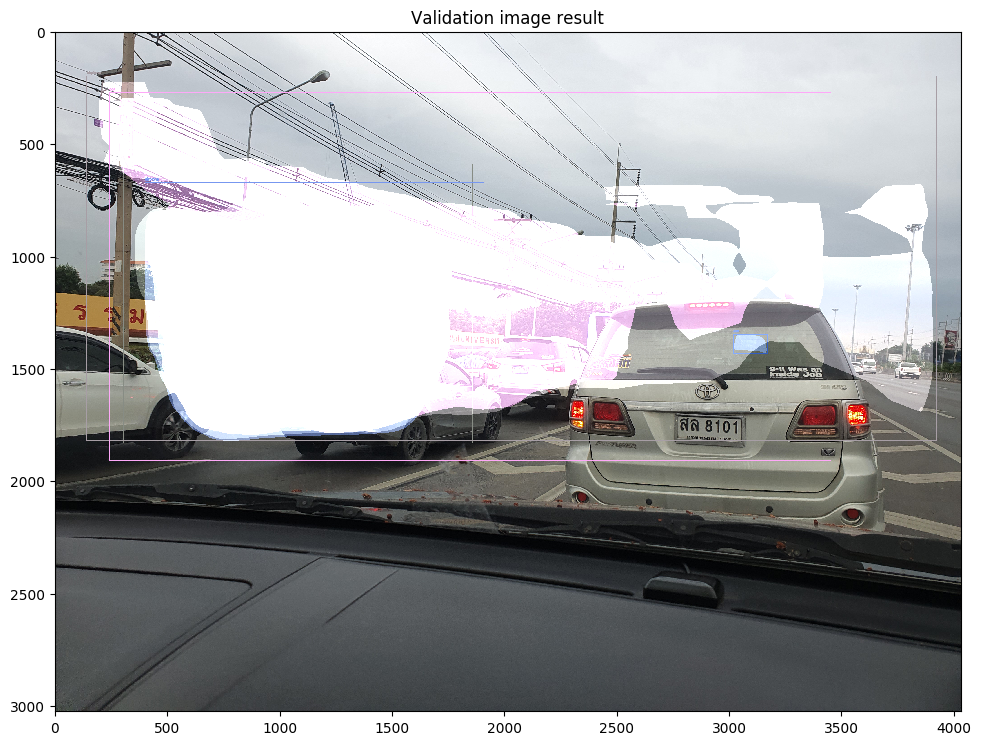

In [5]:
from matplotlib import pyplot as plt

masked_img = prediction_to_mask_image(images, predictions, 0, 0.1)
plt.figure(1, figsize=(12, 9), dpi=100)
plt.imshow(masked_img)
plt.title('Validation image result')
plt.show()

2. Write a program that samples 1000 points from a mixture of 4 2D Gaussians with identity covariance centered at (5,5), (10,5), (5,10), and (10,10).
   Provide the code and a plot of the sample.

In [50]:
def plot_data(fig, ax, X1, X2,X3,X4, labels):
    plt.title('Sample')
    ax.plot(X1[:,0], X1[:,1], 'ro', label=labels[0])
    ax.plot(X2[:,0], X2[:,1], 'bo', label=labels[1])
    ax.plot(X3[:,0], X3[:,1], 'go', label=labels[2])
    ax.plot(X4[:,0], X3[:,1], 'co', label=labels[3])
    ax.axis('equal')
    ax.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':
(1000, 2)


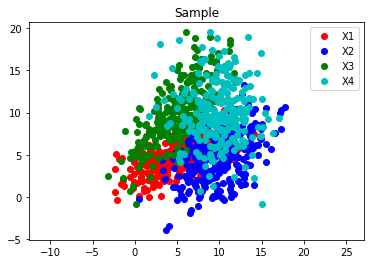

In [49]:
#x1
mean = np.array([5, 5])
cov = np.array([[5, 5], [10, 5]])
X1 = np.random.multivariate_normal(mean, cov, 250)

mean2 = np.array([10, 5])
cov2 = np.array([[10,5], [5, 10]])
X2 = np.random.multivariate_normal(mean2, cov2, 250)

mean3 = np.array([5, 10])
cov3 = np.array([[5, 10], [10, 10]])
X3 = np.random.multivariate_normal(mean3, cov3, 250)

mean4 = np.array([10, 10])
cov4 = np.array([[10, 10], [10, 10]])
X4 = np.random.multivariate_normal(mean4, cov4, 250)

#Train data
X = np.concatenate((X1,X2,X3,X4),axis=0)
print(X.shape)
fig,ax = plt.subplots(1,1)
plot_data(fig, ax, X1, X2,X3,X4, ['X1', 'X2','X3','X4'])

3. Write a GAN generator G and discriminator D to model the dataset you generated in Question 2. Train the GAN and display two plots: a fake sample from the generator and the original sample from Question 2.

In [53]:
#GAN
import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import time

N_Z_PARAMS = 8
class DiscriminativeNet(torch.nn.Module):
    """
    A two hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminativeNet, self).__init__()
        n_features = 2
        n_out = 1

        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 8),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(8, 4),
            nn.LeakyReLU(0.2)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(4, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.out(x)
        return x

class GenerativeNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """

    def __init__(self):
        super(GenerativeNet, self).__init__()
        n_features = N_Z_PARAMS
        n_out = 2

        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 4),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(4, 8),
            nn.LeakyReLU(0.2)
        )
        self.out = nn.Sequential(
            nn.Linear(8, n_out)
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.out(x)
        return x

def noise(size):
    n = torch.randn(size, N_Z_PARAMS)
    n = n.to(device) 
    return n

def real_data_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    data = data.to(device)
    return data

def fake_data_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    data = data.to(device)
    return data

def train_discriminator(optimizer, real_data, fake_data):
    # Reset gradients
    optimizer.zero_grad()
    
    # Propagate real data
    prediction_real = discriminator(real_data)
    error_real = loss(prediction_real, real_data_target(real_data.size(0)))
    error_real.backward()

    # Propagate fake data
    prediction_fake = discriminator(fake_data)
    error_fake = loss(prediction_fake, fake_data_target(real_data.size(0)))
    error_fake.backward()
    
    # Take a step
    optimizer.step()
    
    # Return error
    return error_real + error_fake, prediction_real, prediction_fake

def plt_output(fake_data):
    plt.figure(figsize=(8,8))
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.scatter(fake_data[:,0],fake_data[:,1])
    plt.show()

def train_generator(optimizer, fake_data):
    # Reset gradients
    optimizer.zero_grad()

    # Propagate the fake data through the discriminator and backpropagate.
    # Note that since we want the generator to output something that gets
    # the discriminator to output a 1, we use the real data target here.
    prediction = discriminator(fake_data)
    error = loss(prediction, real_data_target(prediction.size(0)))
    error.backward()
    
    # Update weights with gradients
    optimizer.step()
    
    # Return error
    return error

In [54]:
def plot_data(fig, ax, X1, X2, labels):
    plt.title('Sample')
    ax.plot(X1[:,0], X1[:,1], 'ro', label=labels[0])
    ax.plot(X2[:,0], X2[:,1], 'bo', label=labels[1])
    ax.axis('equal')
    ax.legend()

In [55]:
#Train
samples = torch.Tensor(X)
dataset = torch.utils.data.TensorDataset(samples)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=100, shuffle=True)
num_batches = len(data_loader)

In [58]:
#Test
num_test_samples = 1000
test_noise = noise(num_test_samples)

In [59]:
# Create generator and discriminator

discriminator = DiscriminativeNet()
generator = GenerativeNet()

if torch.cuda.is_available():
    generator.to(device)
    discriminator.to(device)

d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

loss = nn.BCELoss()

 discriminator loss 0.139680
Epoch 1683 generator loss 0.069156 discriminator loss 0.138839
Epoch 1684 generator loss 0.069167 discriminator loss 0.138685
Epoch 1685 generator loss 0.067895 discriminator loss 0.138690
Epoch 1686 generator loss 0.068792 discriminator loss 0.139423
Epoch 1687 generator loss 0.069206 discriminator loss 0.139144
Epoch 1688 generator loss 0.069175 discriminator loss 0.138606
Epoch 1689 generator loss 0.069350 discriminator loss 0.138647
Epoch 1690 generator loss 0.070395 discriminator loss 0.138412
Epoch 1691 generator loss 0.071000 discriminator loss 0.138616
Epoch 1692 generator loss 0.070905 discriminator loss 0.138712
Epoch 1693 generator loss 0.070033 discriminator loss 0.138758
Epoch 1694 generator loss 0.069353 discriminator loss 0.138396
Epoch 1695 generator loss 0.069609 discriminator loss 0.138608
Epoch 1696 generator loss 0.069097 discriminator loss 0.138413
Epoch 1697 generator loss 0.068778 discriminator loss 0.139111
Epoch 1698 generator loss 

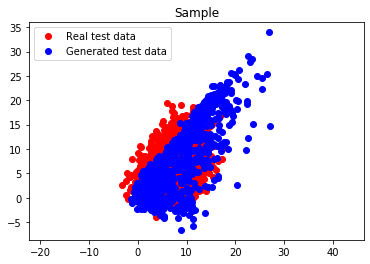

In [61]:
#Training process
num_epochs = 2000
d_error_arr = []
g_error_arr = []
fig,ax = plt.subplots(1,1)
for epoch in range(num_epochs):
    n_batches = 0
    g_err = 0
    d_err = 0
    for n_batch, [real_data] in enumerate(data_loader):

        # Train Discriminator
        real_data = Variable(real_data)   
        real_data = real_data.to(device)
        fake_data = generator(noise(real_data.size(0))).detach()
        d_error, d_pred_real, d_pred_fake = train_discriminator(d_optimizer,
                                                                    real_data, fake_data)
        d_err += d_error.cpu().detach().numpy()

        # Train Generator
            
        fake_data = generator(noise(real_data.size(0)))
        g_error = train_generator(g_optimizer, fake_data)
        g_err += g_error.cpu().detach().numpy()
        n_batches = n_batches + 1
    g_error_arr.append(g_error/n_batches)
    d_error_arr.append(d_error/n_batches)  
    print('Epoch %d generator loss %f discriminator loss %f' %
                (epoch, g_error_arr[epoch], d_error_arr[epoch]))
    test_data_fake = generator(test_noise).cpu().detach()
plot_data(fig, ax, X, test_data_fake, ['Real test data', 'Generated test data'])

4. Suppose you are working on a regression problem for which you have insufficient data and come up with the idea of
   using a GAN to generate new $(\mathbf{x},y)$ pairs. First explain precisely how
   this could be done, then explain why it would be a bad idea.

Answer 4.

1. It is possible to use GAN to working on regression problem. GAN model receive input X from data and go to generative model to generate fake data using noise. Furthermore, we feed X data and fake data into discriminative network. This network is binary-logistic regression which predict real and fake data. Finally, model will update loss and update a generative model for generate fake data that similarly to real data and discriminative model for more accuracy to predict a real data and fake data.

2. I think this is a bad idea because:

    2.1 There are insufficient data to train the model. Discriminator not have accuracy when we use insufficient data.
    
    2.2 Generative model are hard to estimate because of "Latent variable" which we cannot unknow what later vaiable have.

5. Briefly explain the purpose of weight decay and weight clipping, including how they are similar and how they are different.

Answer 5

1.Weight decay is a part of a regularisation in neural network. This is try to optimize a weight by adding small penealty to loss function. We use weight because to prevent overfitting and vanishing gradient.

Example of weight decay is L2-norm

2.Weight cliping showed in Wasserstein GAN which try to prevent overfitting and vanishing gradient same as weight decay.

Weight cliping optimize weight in neural network in the spcific range.

For Example, as you can see in algorithms of Wasserstein GAN. After we update a discriminator, the model compute a weight using RMSProp and clipping a weight into hyperparameter c. this is mean the weight in discriminator must be within a certain range controlled by hyperparameter C.


To conclution, I think weight decay and weight cliping are doing in same purpose that there try to optimize a weight in neural network to prevent overfitting and vanishing gradient(Exploding Gradient). However, there are different in method to do. For weight decay, this technique include in l2 regulalization with small penalty while weight cliping use after compute weight and clipping the weight in range of some hyperparameter.

